In [60]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

customer = pd.read_csv("Customers.csv")
customer

transaction = pd.read_csv("Transactions.csv")
transaction

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [61]:
customer.shape

(200, 4)

In [62]:
transaction.shape

(1000, 7)

In [63]:
merged_df = pd.merge(customer, transaction.groupby('CustomerID').agg({
    'TransactionID': 'count',  
    'TotalValue': 'sum'        
}), on='CustomerID', how='right')

merged_df

,CustomerID,CustomerName,Region,SignupDate,TransactionID,TotalValue
0,C0001,Lawrence Carroll,South America,2022-07-10,5,3354.52
1,C0002,Elizabeth Lutz,Asia,2022-02-13,4,1862.74
2,C0003,Michael Rivera,South America,2024-03-07,4,2725.38
3,C0004,Kathleen Rodriguez,South America,2022-10-09,8,5354.88
4,C0005,Laura Weber,Asia,2022-08-15,3,2034.24
...,...,...,...,...,...,...
194,C0196,Laura Watts,Europe,2022-06-07,4,4982.88
195,C0197,Christina Harvey,Europe,2023-03-21,3,1928.65
196,C0198,Rebecca Ray,Europe,2022-02-27,2,931.83
197,C0199,Andrea Jenkins,Europe,2022-12-03,4,1979.28


In [64]:
features = ['Region', 'TransactionID', 'TotalValue'] 
X = pd.get_dummies(merged_df[features])

In [65]:
ss = StandardScaler()
newX = ss.fit_transform(X)

In [66]:
kmeans = KMeans(n_clusters = 4).fit(newX)

E:\Data_science\download\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1194.0000000000002, 950.9319586608342, 661.9284385198898, 394.02280546798374, 329.44541225659907, 269.9130895858641, 208.1679480290823, 153.98432132213622, 134.67423527937893]


E:\Data_science\download\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Data_science\download\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Data_science\download\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Data_science\download\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

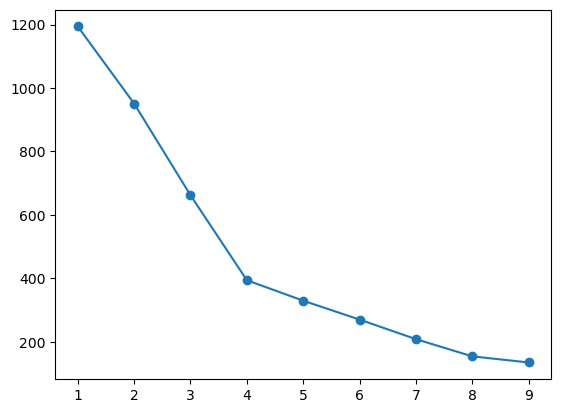

In [70]:
k_values = range(1,10)
inertias =[]

for k in k_values:
    kmeans = KMeans(n_clusters=k).fit(newX)
    inertias.append(kmeans.inertia_)
print(inertias)
    
plt.plot(k_values, inertias,marker ='o')


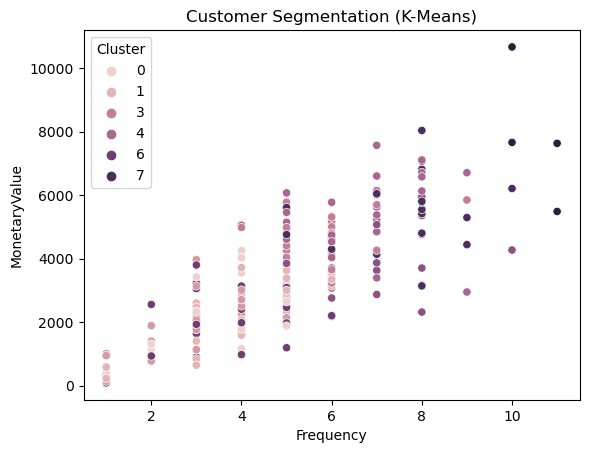

DB Index: 0.718963476232124
                Region  TransactionID   TotalValue
Cluster                                           
0        North America       3.520000  2314.224800
1        South America       3.909091  2415.905152
2                 Asia       3.192308  2124.869231
3               Europe       6.000000  4767.010500
4        South America       6.730769  5370.295769
5        North America       6.823529  3917.594118
6               Europe       3.586207  2077.260345
7                 Asia       7.500000  5379.353889
8        North America      10.000000  7706.510000


In [68]:
#Calculated DB index
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(newX, kmeans.labels_)

# Add cluster labels to dataframe
merged_df['Cluster'] = kmeans.labels_

import seaborn as sns
# Visualize clusters
sns.scatterplot(x='TransactionID', y='TotalValue', hue='Cluster', data=merged_df)
plt.title(f'Customer Segmentation (K-Means)')
plt.xlabel('Frequency')
plt.ylabel('MonetaryValue')
plt.show()

# Analyze cluster characteristics
cluster_profiles = merged_df.groupby('Cluster').agg({
    'Region': lambda x: x.value_counts().index[0],  # Most frequent region
    'TransactionID': 'mean',
    'TotalValue': 'mean'
})

print(f"DB Index: {db_index}")
print(cluster_profiles) 